In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,log_loss


In [3]:
from tqdm import tqdm_notebook 


<p> Here we code a sigmoid neuron which can accept multiple loss functions </p>

<h3> Sigmoid Neuron Class (multiple loss functions) </h3>

In [4]:
class SigmoidNeuron:
    def _init_(self):
        self.w = None
        self.b = None
        
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-(np.dot(x, self.w.T) + self.b)))
    
    def grad_w_mse(self, x ,y):
        y_pred = self.sigmoid(x) 
        return y_pred * (1- y_pred) * x * (y_pred - y) 
        
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(x)
        return y_pred * (1- y_pred) * (y_pred - y)
        
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(x)
        if y==0:
            return y_pred * x
        elif y==1 :
            return -1*(1-y_pred)*x
        
        
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(x)
        if y==0:
            return y_pred
        elif y==1 :
            return -1*(1-y_pred)
        
            
        
    def fit(self , X , Y , lr = 0.1 , epochs = 10 , initialize =True, loss_fn = 'mse', display_loss = False):
        
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        if display_loss:
            loss={}
            
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y) 
                    #print(dw)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
          
            m = X.shape[1]  
            self.w -= lr * dw/m
            self.b -= lr * db/m
      
            if display_loss:
                Y_pred = self.sigmoid(X)
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)
    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
            plt.show()
    
        
        
        
        
        
        
        
        
        
        
    def predict(self, X):
        Y_pred=[]
        for x in X:
            y_pred = self.sigmoid(x)
            Y_pred.append(y_pred)
            
        return np.array(Y_pred)
        

<h3> Sample Data Creation </h3>

In [5]:
from sklearn.datasets import make_blobs

In [6]:
#data is the input vector
#labels indicate which class the sample belongs to
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


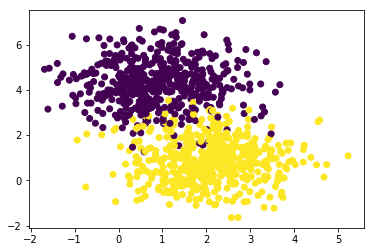

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels)


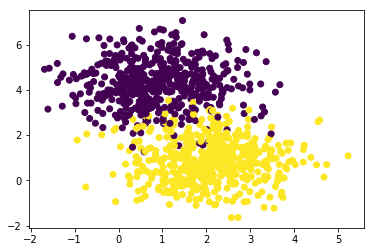

In [8]:
labels_orig = labels
labels = np.mod(labels_orig, 2)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

<h3> Training Sigmoid Neuron with CE loss and computing accuracy </h3>

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site

c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


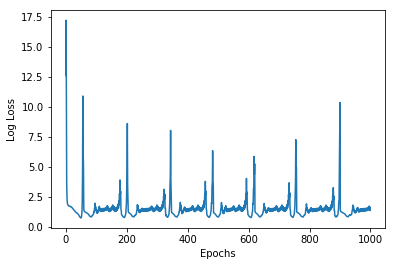

In [10]:
# we use cross entropy loss instead of mse loss, as this is a classification problem
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, lr=0.5, display_loss=True,loss_fn='ce')

In [11]:
Y_pred_train = sn.predict(X_train)
Y_pred_train_binarised = (Y_pred_train > 0.5).astype(int).ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_val_binarised = (Y_pred_val > 0.5).astype(int).ravel()

In [13]:
print('Accuracy on the train data is',accuracy_score(Y_pred_train_binarised,Y_train))
print('Accuracy on the train data is',accuracy_score(Y_pred_val_binarised,Y_val))


Accuracy on the train data is 0.9453333333333334
Accuracy on the train data is 0.94


<h3> Training Sigmoid Neuron with MSE loss and computing accuracy </h3>

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

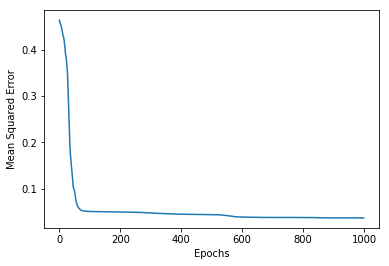

In [14]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, lr=0.5, display_loss=True,loss_fn='mse')

In [15]:
Y_pred_train = sn.predict(X_train)
Y_pred_train_binarised = (Y_pred_train > 0.5).astype(int).ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_val_binarised = (Y_pred_val > 0.5).astype(int).ravel()

In [16]:
print('Accuracy on the train data is',accuracy_score(Y_pred_train_binarised,Y_train))
print('Accuracy on the train data is',accuracy_score(Y_pred_val_binarised,Y_val))


Accuracy on the train data is 0.9626666666666667
Accuracy on the train data is 0.94
